In [1]:
# Brainstation: Capstone Sprint 2          Bobbie Razo 2024.03.12

# expand border width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# hide warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Needed libraries
# data manipulation
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Set the style to ggplot
plt.style.use("seaborn-darkgrid")


In [3]:
# if using a localized IDE
dataFileNamePath = 'Data/data.csv'

In [4]:
# Import the data into a master variable to hold the raw data in case it's needed again later with having to load from the file
masterRawData = pd.read_csv(dataFileNamePath)

#confirm data file is loaded: use shape/head
print("The dataframe shape is: ", masterRawData.shape, ": ", masterRawData.shape[0], "- Rows, ", masterRawData.shape[1], "- Columns\n")
masterRawData.head()   

The dataframe shape is:  (4424, 37) :  4424 - Rows,  37 - Columns



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


There are 37 features and 4424 instances

In [5]:
data = masterRawData.copy()

In [6]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 150)  # Adjust the width as needed
print("Head\n", data.head())  # prefer to use print here with display width adjusted to force wrapping text to view all columns at once and avoid having to scroll left to right
print("\nTail\n", data.tail())

Head
    Marital status  Application mode  Application order  Course  Daytime/evening attendance\t  Previous qualification  \
0               1                17                  5     171                             1                       1   
1               1                15                  1    9254                             1                       1   
2               1                 1                  5    9070                             1                       1   
3               1                17                  2    9773                             1                       1   
4               2                39                  1    8014                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  \
0                           122.0            1                      19                      12                    5                  

- All of the columns appear to contain numbers except for the Target column which is a 3 class categorical text column that we will label encoded.

- There are a number of label encoded columns that need to be one-hot encoded, such as Marital Status, Application mode, Course, *qualification, Mother/Father occupation, Nacionality (which should be corrected to Nationality). 

- There are columns that have the apostrophe punctuation mark.  These might caused issues when referencing them in code so this will need to be removed.

In [7]:
# fix Nacionality column name typo to Nationality
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
print("Sample\n", data['Nationality'].sample()) # check and view if new column name exists

Sample
 826    1
Name: Nationality, dtype: int64


In [8]:
# Look at the data types of columns and if there are any nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The only text column is just the Target variable according to .info

All the columns have 4424 non-nulls which match the row count from .shape earlier.  

Run the .isna also to make sure.        

In [11]:
print("Total Null Values: ", data.isna().sum().sum())

Total Null Values:  0


Looks good.

Now remove the apostrophes from the columns that have them.  

In [9]:
for column_name in data.columns:
    # Check if the column name contains an apostrophe
    if "'" in column_name:
        # Remove the apostrophe and update the column name
        new_column_name = column_name.replace("'", "")
        data.rename(columns={column_name: new_column_name}, inplace=True)

In [10]:
# check if the apostrophes were removed
print(data.sample())

      Marital status  Application mode  Application order  Course  Daytime/evening attendance\t  Previous qualification  \
2894               1                17                  4    9853                             1                       1   

      Previous qualification (grade)  Nationality  Mothers qualification  Fathers qualification  Mothers occupation  Fathers occupation  \
2894                           122.0            1                     38                     37                   9                   9   

      Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
2894            118.9          1                          0       0                        1       0                   0                 20   

      International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  \
2894              0                               

Take a look at the number of unique values of each feature and sort in ascending order.

In [12]:
# Number of unique values per column in ascending order
data.nunique().sort_values()

Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance\t                        2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                             17
Application mode            

In [13]:
#get a look at some of the data from the Curricular* columns to see if they are purely numeric or label encoded
data.filter(like='Curricular').sample(10)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
1107,0,7,8,7,12.650000,0,0,8,9,8,12.445556,0
4320,0,5,9,3,12.333333,0,0,5,8,4,11.250000,0
3615,0,6,6,3,12.666667,0,0,6,11,4,11.142857,0
1412,3,9,11,6,10.500000,0,4,10,10,10,11.700000,0
4085,2,6,9,6,12.000000,0,1,6,8,3,14.666667,0
2976,0,6,8,6,13.000000,0,0,6,6,6,12.166667,0
2880,0,6,8,5,12.200000,0,0,6,10,4,11.250000,0
3449,0,7,7,7,14.485714,0,0,8,9,8,14.588889,0
304,0,6,11,0,0.000000,0,0,6,0,0,0.000000,0
2238,0,6,11,6,11.333333,0,0,6,12,3,11.333333,0


These Curricular* columns don't appera to be categorical.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


From the .describe function there might be outliers with the following  columns accorrding to how much jump the max values are compared to the 75 percentile: 
###### -Marital status,  Application order, Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (approved), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (without evaluations)

Let's plot the numeric features onto histograms to further understand its distributions.

In [15]:
# Plot out the numeric columns to view the distribution
numericColumns = data.loc[:, data.select_dtypes(include=['number']).columns]         # get the numeric columns
numericColumns.shape

(4424, 36)

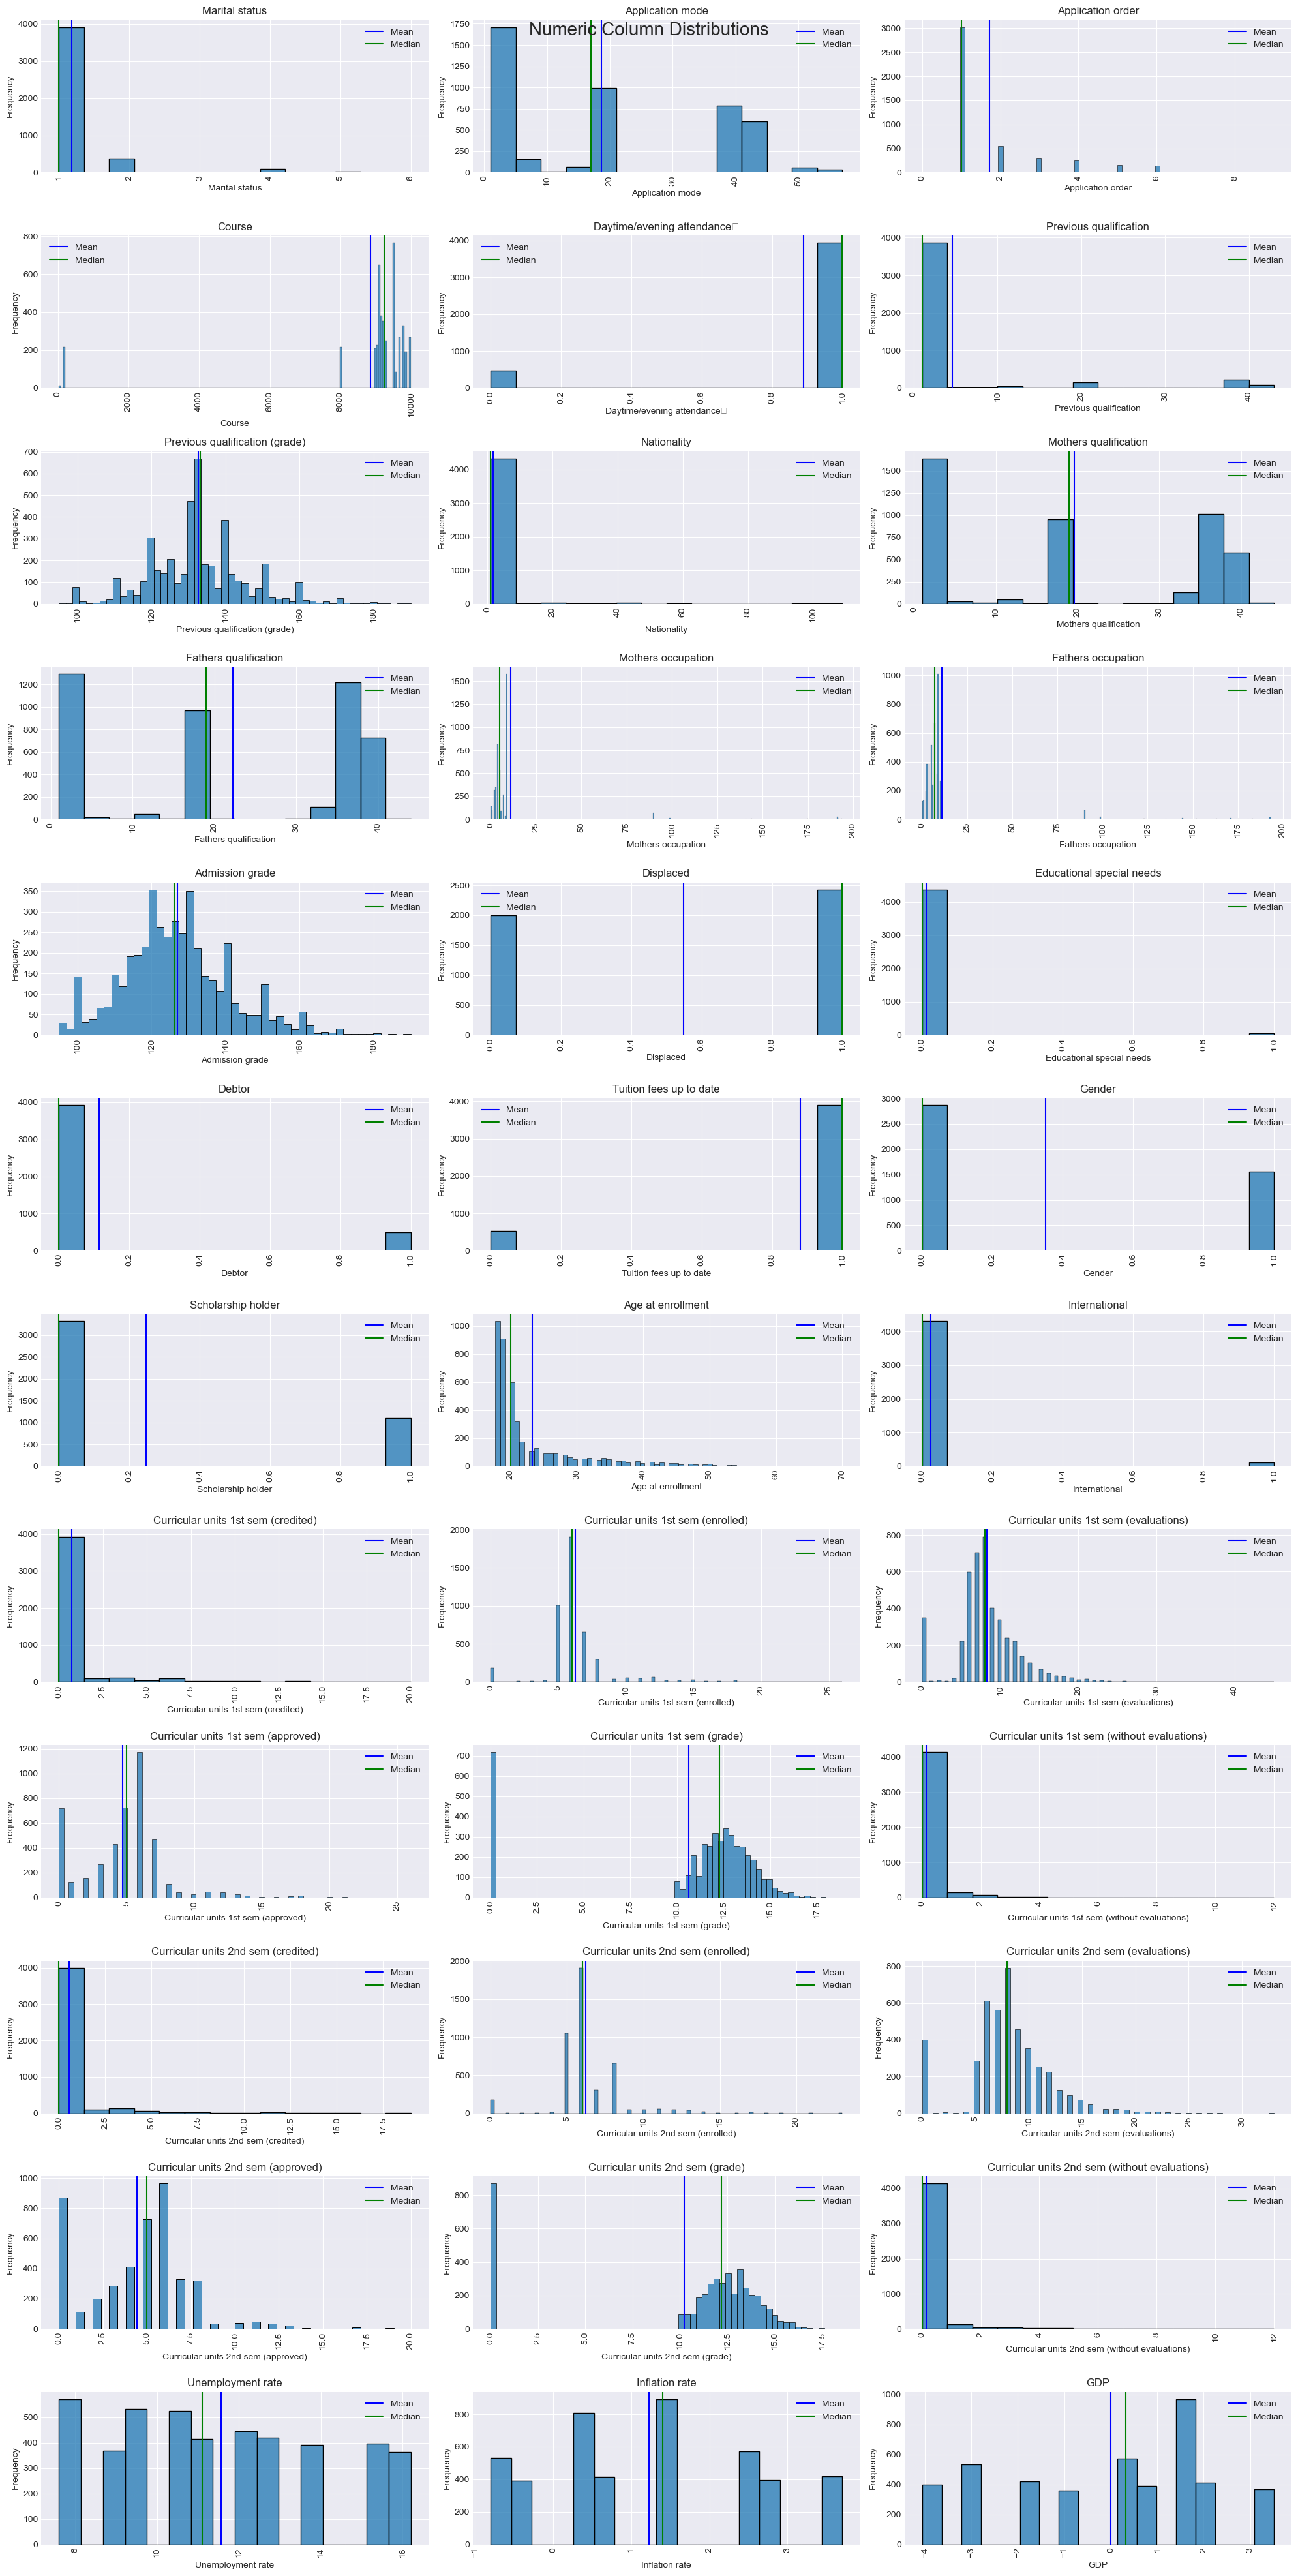

In [16]:
# Plot layout of numeric columns
plt.subplots(12, 3, figsize=(20, 40))  # using a 4 x 7 grid of graphs since we are working with 28 columns; each graph will be 20x20 in size
plt.suptitle('Numeric Column Distributions', size=20)

for i, column in enumerate(numericColumns.columns, 1):
    plt.subplot(12, 3, i)
    sns.histplot(numericColumns[column])
    #sns.countplot(data[column])
    
    plt.xticks(rotation=90) 
    
    # Include titles and labels
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Include median and mean lines
    plt.axvline(data[column].mean(), c='blue', label='Mean')
    plt.axvline(data[column].median(), c='green', label='Median')
    plt.legend()
    
plt.tight_layout()
plt.show()

This helps in giving a picture of the distribution of all the numeric columns: 
- Marital Status is skewed towards Single.
- Nationality is skewed towards Portuguese. 

Somewhat normally distributed features are:
- Previous qualification (grade)
- Admission grade
- Circular units 1st & 2nd sem (grade) (but with predominance on zero's)

Binary features: 
- Daytime/evening attendance (majority in Daytime)
- Displaced  (close to balanced but Displaced is dominant)
- Educational special needs (mostly no)
- Debtor (mostly no)
- Tuition fees up to date (majority are)
- Gender (female are close to twice as much as male)
- Scholarship holder (majority no)
- International (very small fraction are)

Unemployment rate, Inflation rate, GDP are probably  specific to the student's country. According to the .nunique results earlier there seems to be 10 different countries

Age of enrollment seems to have a natural progression where the majority age of students are 18-20 and it tapers down as the age increases



##### Let's look at the Target column now


In [17]:
data.describe(include='object')

,Target
count,4424
unique,3
top,Graduate
freq,2209


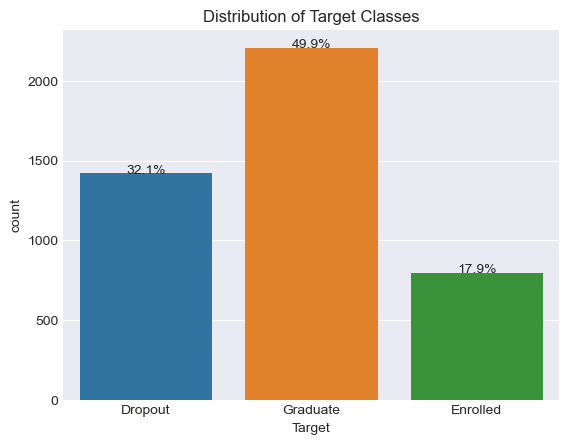

In [18]:
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")

plt.show()

As described on the [website](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) source of this data, there are 3 classes on the categorical Target variable.  The Graduate value is the most at close to 50% of the data.  Dropout at 32% is 2nd and then Enrolled is place with 17%.

Essentially for modelling this needs to be a numerical column, label encoded. Let's do that now and use the ID maps below:

- Dropout - 1
- Graduate - 2
- Enrolled - 3

In [24]:
from sklearn.preprocessing import LabelEncoder

class_mapping = {'Graduate': 2, 'Enrolled': 3, 'Dropout': 1}
data['TargetEncoded'] = data['Target'].map(class_mapping)

print(data['TargetEncoded'].sample(5))

3005    2
1226    2
3637    3
2499    1
1669    2
Name: TargetEncoded, dtype: int64


Plot the new target column just to check.

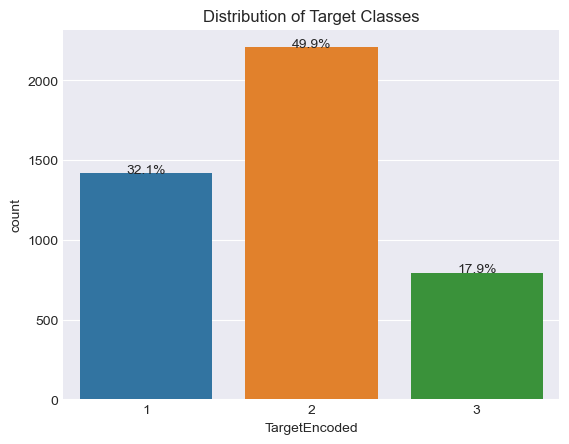

In [25]:
sns.countplot(x='TargetEncoded', data=data)
plt.title('Distribution of Target Classes')

# show percentage of each Target value on plot
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 0.1,
             '{:.1f}%'.format((height / total) * 100),
             ha="center")

plt.show()

Looks good and identical to the original Target columns.  So we will now drop the original column.

In [26]:
data.drop(columns=['Target'], inplace=True)

In [27]:
# Check that the original Target columns is removed
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


I will also take the next step and convert this 3 class Target variable into binary since Graduate and Enrolled can be seen as the same in terms of a student dropping out or not.  Both are considered *Not Dropped*.   So we will combine Graduate (2) and Enrolled (3) into one bucket.  To make it simple I will update both Graduate (2) and Enrolled (3) to 0.  This will convert the TargetEncoded variable to binary where having the 0 value represents *Not Dropped* while 1 means *Dropped*.

In [28]:
# Update values 2, 3 to 0
data.loc[data['TargetEncoded'].isin([2, 3]), 'TargetEncoded'] = 0
# check and print count of all unique values
print(data['TargetEncoded'].value_counts())
data.head()

TargetEncoded
0    3003
1    1421
Name: count, dtype: int64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


For now we will convert all the categorical features into dummy variables.  We will adjust the amount of *buckets* by decreasing it to see if the large one-hot encoding will adversely affect its fit for modelling. 

These columns are: 
- Marital Status 
- Application mode 
- Application order 
- Course 
- Previous qualification 
- Nationality
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation

Because of the high cardinality (large number of unique values in each) of these columns it may not provide much predictive power in machine learning models and can lead to overfitting.   There are a few strategies to overcome this but for now let's convert them to one-hot encoded features and see how it models. 

I'll do this in a loop.  But since these column names are long I'll create a dictionary containing these columns to convert and the prefix name to use. 


In [29]:
# Dictionary mapping column names to prefixes
column_prefixes = {'Marital status': 'Marital_', 
                   'Application mode': 'AppMode_', 
                   'Application order': 'AppOrder_', 
                   'Course': 'Course_', 
                   'Previous qualification': 'PrevQual_', 
                   'Nationality': 'Nation_', 
                   'Mothers qualification': 'MotherQual_', 
                   'Fathers qualification': 'FatherQual_', 
                   'Mothers occupation': 'MotherOcc_', 
                   'Fathers occupation': 'FatherOcc_'}

# Loop through each column and perform one-hot encoding with the specified prefix
for column, prefix in column_prefixes.items():

     # Perform one-hot encoding
    one_hot_encoded_df = pd.get_dummies(data[column], prefix=prefix)

    # Drop one dummy variable (the one with the least frequency value)
    least_freq_dummy = one_hot_encoded_df.sum().idxmin()
    one_hot_encoded_df.drop(columns=[least_freq_dummy], inplace=True)
    
    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    data = pd.concat([data, one_hot_encoded_df], axis=1)

    # Drop the original categorical column
    data.drop(columns=[column], inplace=True)

In [30]:
# check the shape of data now
data.shape

(4424, 245)

There are now 245 features in the dataframe including the Target variable and 4424 instances.

In [31]:
data.head()

,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,TargetEncoded,Marital__1,Marital__2,Marital__4,Marital__5,Marital__6,AppMode__1,AppMode__2,AppMode__5,AppMode__7,AppMode__10,AppMode__15,AppMode__16,AppMode__17,AppMode__18,AppMode__27,AppMode__39,AppMode__42,AppMode__43,AppMode__44,AppMode__51,AppMode__53,AppMode__57,AppOrder__1,AppOrder__2,AppOrder__3,AppOrder__4,AppOrder__5,AppOrder__6,AppOrder__9,Course__171,Course__8014,Course__9003,Course__9070,Course__9085,Course__9119,Course__9130,Course__9147,Course__9238,Course__9254,Course__9500,Course__9556,Course__9670,Course__9773,Course__9853,Course__9991,PrevQual__1,PrevQual__2,PrevQual__3,PrevQual__4,PrevQual__6,PrevQual__9,PrevQual__10,PrevQual__12,PrevQual__14,PrevQual__15,PrevQual__19,PrevQual__38,PrevQual__39,PrevQual__40,PrevQual__42,PrevQual__43,Nation__1,Nation__2,Nation__6,Nation__11,Nation__14,Nation__17,Nation__21,Nation__22,Nation__24,Nation__25,Nation__26,Nation__32,Nation__41,Nation__62,Nation__100,Nation__101,Nation__103,Nation__105,Nation__108,Nation__109,MotherQual__1,MotherQual__2,MotherQual__3,MotherQual__4,MotherQual__5,MotherQual__6,MotherQual__9,MotherQual__10,MotherQual__11,MotherQual__12,MotherQual__14,MotherQual__19,MotherQual__22,MotherQual__26,MotherQual__27,MotherQual__29,MotherQual__30,MotherQual__34,MotherQual__35,MotherQual__36,MotherQual__37,MotherQual__38,MotherQual__39,MotherQual__40,MotherQual__41,MotherQual__42,MotherQual__43,MotherQual__44,FatherQual__1,FatherQual__2,FatherQual__3,FatherQual__4,FatherQual__5,FatherQual__6,FatherQual__9,FatherQual__10,FatherQual__11,FatherQual__12,FatherQual__14,FatherQual__18,FatherQual__19,FatherQual__20,FatherQual__22,FatherQual__25,FatherQual__26,FatherQual__27,FatherQual__29,FatherQual__30,FatherQual__31,FatherQual__33,FatherQual__34,FatherQual__35,FatherQual__36,FatherQual__37,FatherQual__38,FatherQual__39,FatherQual__40,FatherQual__41,FatherQual__42,FatherQual__43,FatherQual__44,MotherOcc__0,MotherOcc__1,MotherOcc__2,MotherOcc__3,MotherOcc__4,MotherOcc__5,MotherOcc__6,MotherOcc__7,MotherOcc__8,MotherOcc__9,MotherOcc__10,MotherOcc__90,MotherOcc__99,MotherOcc__122,MotherOcc__123,MotherOcc__131,MotherOcc__132,MotherOcc__134,MotherOcc__141,MotherOcc__143,MotherOcc__144,MotherOcc__151,MotherOcc__152,MotherOcc__153,MotherOcc__171,MotherOcc__173,MotherOcc__175,MotherOcc__191,MotherOcc__192,MotherOcc__193,MotherOcc__194,FatherOcc__0,FatherOcc__1,FatherOcc__2,FatherOcc__3,FatherOcc__4,FatherOcc__5,FatherOcc__6,FatherOcc__7,FatherOcc__8,FatherOcc__9,FatherOcc__10,FatherOcc__90,FatherOcc__99,FatherOcc__102,FatherOcc__103,FatherOcc__112,FatherOcc__114,FatherOcc__121,FatherOcc__122,FatherOcc__123,FatherOcc__124,FatherOcc__131,FatherOcc__132,FatherOcc__134,FatherOcc__135,FatherOcc__141,FatherOcc__143,FatherOcc__144,FatherOcc__151,FatherOcc__152,FatherOcc__153,FatherOcc__154,FatherOcc__161,FatherOcc__163,FatherOcc__171,FatherOcc__172,FatherOcc__174,FatherOcc__175,FatherOcc__181,FatherOcc__182,FatherOcc__183,FatherOcc__192,FatherOcc__193,FatherOcc__194,FatherOcc__195
0,1,122.0,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,Fals

[back to Table of Contents](#Table-of-Contents)

### Basic Initial Modeling

To get a baseline let's fit this into a logistic model. 


Split the data between target and independent variables and then split between training and test data.

In [42]:
# Split the data between independent and dependent
X = data.drop('TargetEncoded', axis=1)  
y = data['TargetEncoded']
print('X shape', X.shape)
print('y shape', y.shape)

X shape (4424, 244)
y shape (4424,)


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3539, 244)
X_test:  (885, 244)
y_train:  (3539,)
y_test:  (885,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy.round(4))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8475
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       569
           1       0.85      0.70      0.77       316

    accuracy                           0.85       885
   macro avg       0.85      0.81      0.83       885
weighted avg       0.85      0.85      0.84       885



Accuracy: 0.8475 <br>
Classification Report:
|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
|     0     |    0.85   |  0.93  |   0.89   |   569   |
|     1     |    0.85   |  0.70  |   0.77   |   316   |
|-----------|-----------|--------|----------|---------|
|  Accuracy |           |        |   0.85   |   885   |
| Macro Avg |    0.85   |  0.81  |   0.83   |   885   |
|Weighted Avg|   0.85   |  0.85  |   0.84   |   885   |


Not bad with an accuracy of 84%.  The Precision, Recall, F1 scores are also good, very good actually.  This might indicate that the high cardinality of the features are causing an overfitting. 

Let's try to use PCA to reduce dimensionality.

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Here, we set n_components to 0.90 to retain 90% of the variance in the data
pca = PCA(n_components=0.80)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [52]:
# Confirm the X PCA shape has decreased
print('X_train_scaled: ', X_train_scaled.shape)
print('X_test_scaled: ', X_test_scaled.shape)
print('X_train_pca: ', X_train_pca.shape)
print('X_test_pca: ', X_test_pca.shape)

X_train_scaled:  (3539, 244)
X_test_scaled:  (885, 244)
X_train_pca:  (3539, 131)
X_test_pca:  (885, 131)


In [53]:
# Now apply the same logistic model to the reduced features
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Evaluate model performance on the testing data
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy.round(4))


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8441
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       569
           1       0.86      0.67      0.76       316

    accuracy                           0.84       885
   macro avg       0.85      0.81      0.82       885
weighted avg       0.85      0.84      0.84       885



Accuracy: 0.8508 <br>
Classification Report:
|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
|     0     |    0.85   |  0.93  |   0.89   |   569   |
|     1     |    0.85   |  0.71  |   0.77   |   316   |
|-----------|-----------|--------|----------|---------|
|  Accuracy |           |        |   0.85   |   885   |
| Macro Avg |    0.85   |  0.82  |   0.83   |   885   |
|Weighted Avg|   0.85   |  0.85  |   0.85   |   885   |



The accuracy went up very little with PCA of 90% variance retention.